# Task 5: Introduction to Computer Vision with OpenCV

## Section 1: Setup & Dataset

### **Task 1**: Load and Display an Image
*Instruction*: Using OpenCV, read an image (`sample.jpg`) and display it using both OpenCV and Matplotlib.

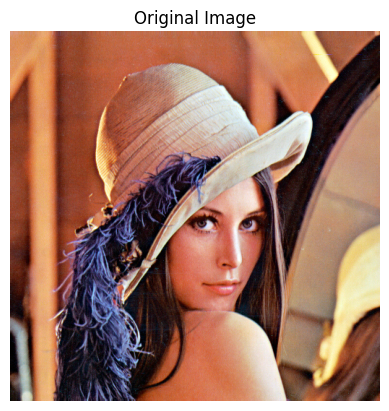

In [3]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('sample.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display using OpenCV (works in a standard Python environment, but not in Jupyter)
# Uncomment the following lines to use OpenCV display
# cv2.imshow('Image', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Display using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axes
plt.title('Original Image')
plt.show()

## Section 2: Image Properties and Resizing

### **Task 2**: Print Image Properties and Resize

*Instruction*: Print the shape (height, width, channels) of the image. Resize it to 100x100 pixels.


Original Shape: (512, 512, 3)


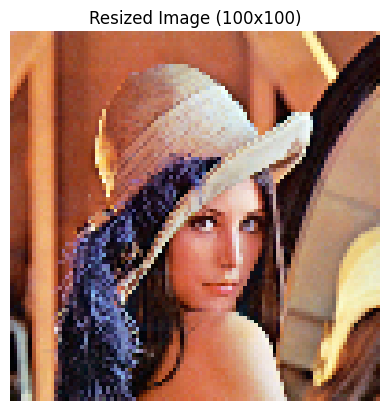

In [4]:
print(f"Original Shape: {image.shape}")
resized = cv2.resize(image, (100, 100))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title("Resized Image (100x100)")
plt.axis('off')
plt.show()

## Section 3: Cropping and Rotation

### **Task 3**: Crop and Rotate the Image

*Instruction*: Use Keras to create a simple feedforward neural network with:


*   Crop the center square of the image
*   Rotate the image by 45 degrees using `cv2.getRotationMatrix2D`


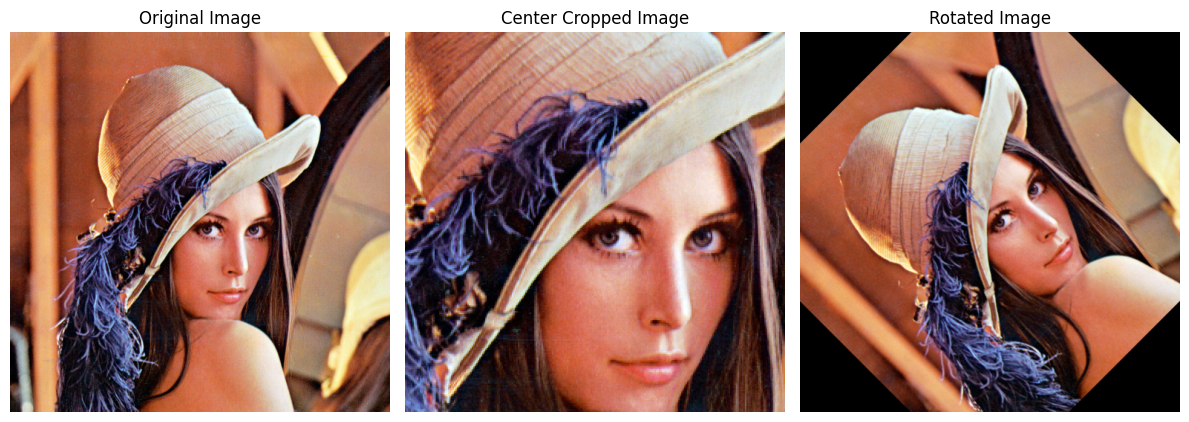

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 786432)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │   100,663,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,672,330 (384.03 MB)

 Trainable params: 100,672,330 (384.03 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers

# Load the image
image = cv2.imread('sample.jpg')

# Cropping the center square of the image
(h, w) = image.shape[:2]
center_crop = image[h//4:h*3//4, w//4:w*3//4]

# Rotating the image by 45 degrees
M = cv2.getRotationMatrix2D((w//2, h//2), 45, 1.0)  # Rotate around the center
rotated = cv2.warpAffine(image, M, (w, h))

# Display the cropped and rotated images
plt.figure(figsize=(12, 6))

# Original image for reference (optional)
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

# Cropped image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(center_crop, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Center Cropped Image')

# Rotated image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Rotated Image')

plt.tight_layout()
plt.show()

# Create a simple feedforward neural network using Keras
model = keras.Sequential([
    layers.Flatten(input_shape=(h, w, 3)),  # Adjust based on input needs
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

## Section 4: Drawing & Annotation

### **Task 4**: Draw Shapes and Text on an Image

*Instruction*: Draw a rectangle, circle, line, and add text on the image.

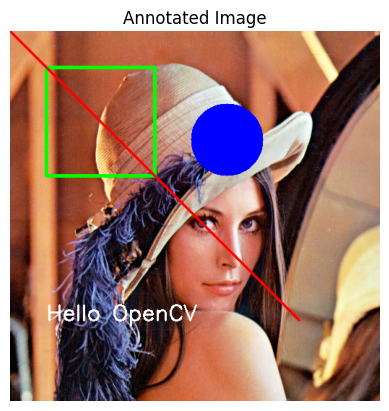

In [7]:
annotated = image.copy()
cv2.rectangle(annotated, (50, 50), (200, 200), (0, 255, 0), 3)
cv2.circle(annotated, (300, 150), 50, (255, 0, 0), -1)
cv2.line(annotated, (0, 0), (400, 400), (0, 0, 255), 2)
cv2.putText(annotated, "Hello OpenCV", (50, 400), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.title("Annotated Image")
plt.axis('off')
plt.show()

## Section 5: Filters and Edge Detection

### **Task 5**:  Apply Blur and Canny Edge Detection

*Instruction*: Apply Gaussian blur and detect edges using the Canny algorithm.


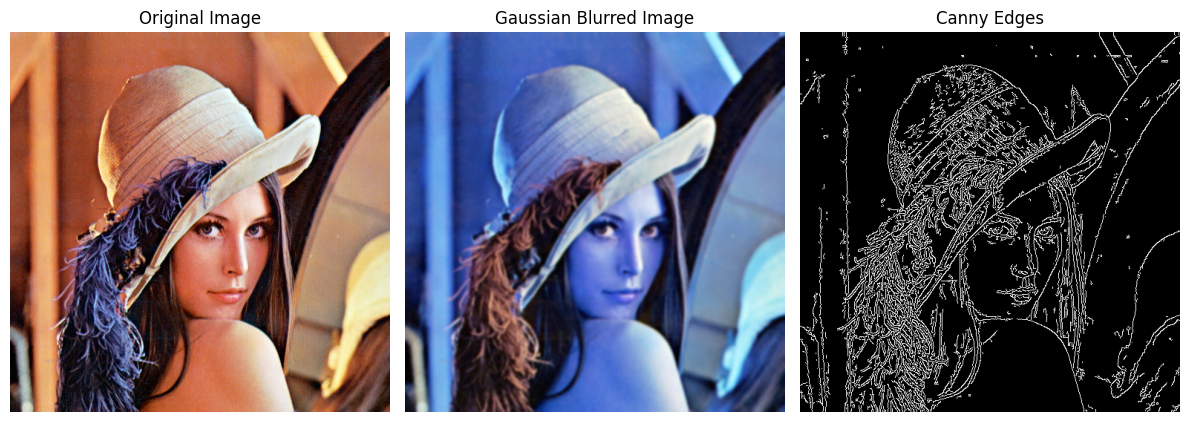

In [9]:
blurred = cv2.GaussianBlur(image, (7, 7), 0)
edges = cv2.Canny(image, 100, 200)

# Display
# Your code here
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('sample.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(image, (7, 7), 0)

# Detect edges using Canny algorithm
edges = cv2.Canny(image, 100, 200)

# Convert edges to RGB for display with Matplotlib (since edges are single-channel)
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

# Display the images using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(blurred)
plt.axis('off')
plt.title('Gaussian Blurred Image')

plt.subplot(1, 3, 3)
plt.imshow(edges_rgb)
plt.axis('off')
plt.title('Canny Edges')

plt.tight_layout()
plt.show()

## Section 6: Color Spaces and Histogram

### **Task 6**: Convert Color Spaces and Plot Histogram

*Instruction*: Convert the image to grayscale and HSV. Then plot a histogram of grayscale values.

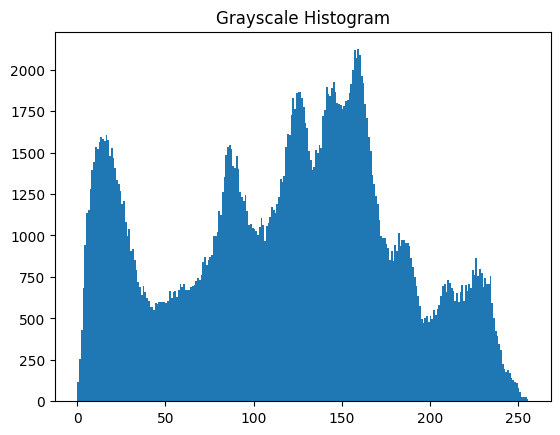

In [10]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

plt.hist(gray.ravel(), bins=256, range=[0,256])
plt.title("Grayscale Histogram")
plt.show()